# Lab 3: Text Analysis (20 Pts)


In [1]:
# Run this cell to set up your notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re


# Ensure that Pandas shows at least 280 characters in columns, so we can see full tweets
pd.set_option('max_colwidth', 280)
plt.style.use('fivethirtyeight')
sns.set()
sns.set_context("talk")

def horiz_concat_df(dict_of_df, head=None):
    """
    Horizontally concatenante multiple DataFrames for easier visualization. 
    Each DataFrame must have the same columns.
    """
    df = pd.concat([df.reset_index(drop=True) for df in dict_of_df.values()], axis=1, keys=dict_of_df.keys())
    if head is None:
        return df
    return df.head(head)

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Question 1: Importing the Data


The data for this assignment was obtained using the [Twitter APIs](https://developer.twitter.com/en/docs/twitter-api).  To ensure that everyone has the same data and to eliminate the need for every student to apply for a Twitter developer account, we have collected a sample of tweets from several high-profile public figures.  The data is stored in the folder `data`.  Run the following cell to list the contents of the directory:

In [2]:
# just run this cell
from os import listdir
for f in listdir("data"):
    print(f)

AOC_recent_tweets.txt
BernieSanders_recent_tweets.txt
BillGates_recent_tweets.txt
Cristiano_recent_tweets.txt
elonmusk_recent_tweets.txt
EmmanuelMacron_recent_tweets.txt


--- 
### Question 1a

Let's examine the contents of one of these files.  Using the [`open` function](https://docs.python.org/3/library/functions.html#open) and [`read` operation](https://docs.python.org/3/tutorial/inputoutput.html#methods-of-file-objects) on a python file object, read the first 1000 **characters** in `data/BernieSanders_recent_tweets.txt` and store your result in the variable `q1a`.  Then display the result so you can read it.

**Caution:** Viewing the contents of large files in a Jupyter notebook could crash your browser.  Be careful not to print the entire contents of the file.

**Hint:** You might want to try to use `with`:

```python
with open("filename", "r") as f:
    f.read(2)
```


<!--
BEGIN QUESTION
name: q1a
points: 1
-->

In [3]:
with open("data/BernieSanders_recent_tweets.txt", "r") as f:
    q1a = f.read(1000)
q1a


'[{"created_at": "Sat Feb 06 22:43:03 +0000 2021", "id": 1358184460794163202, "id_str": "1358184460794163202", "full_text": "Why would we want to impeach and convict Donald Trump \\u2013 a president who is now out of office? Because it must be made clear that no president, now or in the future, can lead an insurrection against the government he or she is sworn to protect.", "truncated": false, "display_text_range": [0, 243], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": []}, "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 216776631, "id_str": "216776631", "name": "Bernie Sanders", "screen_name": "BernieSanders", "location": "Vermont", "description": "U.S. Senator for Vermont. Not me, us.", "url": "https://t.co/jpg8Sp1GhR", "entitie

--- 
### Question 1b

What format is the data in? Answer this question by entering the letter corresponding to the right format in the variable `q1b` below.

A. CSV<br/>
B. HTML<br/>
C. JavaScript Object Notation (JSON)<br/>
D. Excel XML

Answer in the following cell. Your answer should be a string, either `"A"`, `"B"`, `"C"`, or `"D"`.

<!--
BEGIN QUESTION
name: q1b
points: 
    - 0
    - 1
-->

In [4]:
q1b = "C"

--- 

### Question 1c

Pandas has built-in readers for many different file formats including the file format used here to store tweets.  To learn more about these, check out the documentation for [`pd.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html), [`pd.read_html`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html), [`pd.read_json`](https://pandas.pydata.org/docs/reference/api/pandas.io.json.read_json.html#pandas.io.json.read_json), and [`pd.read_excel`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html).  

1. Use one of these functions to populate the `tweets` dictionary with the tweets for: `AOC`, `Cristiano`, and `elonmusk`. The keys of `tweets` should be the handles of the users, which we have provided in the cell below, and the values should be the DataFrames.
2. Set the index of each DataFrame to correspond to the `id` of each tweet.  



**Hint:** You might want to first try loading one of the DataFrames before trying to complete the entire question.

<!--
BEGIN QUESTION
name: q1c
points: 3
-->

In [9]:
tweets = {
    "AOC": pd.read_json("data/AOC_recent_tweets.txt"),
    "Cristiano": pd.read_json("data/Cristiano_recent_tweets.txt"),
    "elonmusk": pd.read_json("data/elonmusk_recent_tweets.txt"),
}

If you did everything correctly, the following cells will show you the first 5 tweets for Elon Musk (and a lot of information about those tweets).

In [10]:
# just run this cell
tweets["elonmusk"].head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2021-02-06 09:58:04+00:00,1357991946082418690,1357991946082418688,The Second Last Kingdom https://t.co/Je4EI88HmV,False,"[0, 23]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1357991942471094275, 'id_str': '1357991942471094275', 'indices': [24, 47], 'media_url': 'http://pbs.twimg.com/media/EtiOegrVEAMCgZE.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EtiOegrV...","{'media': [{'id': 1357991942471094275, 'id_str': '1357991942471094275', 'indices': [24, 47], 'media_url': 'http://pbs.twimg.com/media/EtiOegrVEAMCgZE.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EtiOegrVEAMCgZE.jpg', 'url': 'https://t.co/Je4EI88HmV', 'display_url': '...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,352096,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2021-02-06 08:45:02+00:00,1357973565413367808,1357973565413367808,@DumDin7 @Grimezsz Haven’t heard that name in years …,False,"[19, 53]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'DumDin7', 'name': 'Dum Din', 'id': 1279896279733145601, 'id_str': '1279896279733145601', 'indices': [0, 8]}, {'screen_name': 'Grimezsz', 'name': '𝑪𝒍𝒂𝒊𝒓𝒆 𝒅𝒆 𝑳𝒖𝒏𝒆࿎', 'id': 276540738, 'id_str': '276540738', 'indi...",NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",1.357973e+18,...,2155,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
2,2021-02-06 08:42:25+00:00,1357972904663687173,1357972904663687168,@Grimezsz Dogecake,False,"[10, 18]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'Grimezsz', 'name': '𝑪𝒍𝒂𝒊𝒓𝒆 𝒅𝒆 𝑳𝒖𝒏𝒆࿎', 'id': 276540738, 'id_str': '276540738', 'indices': [0, 9]}], 'urls': []}",NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",1.357835e+18,...,5373,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
3,2021-02-06 08:32:55+00:00,1357970517165182979,1357970517165182976,YOLT\n\nhttps://t.co/cnOf9yjpF1,False,"[0, 29]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/cnOf9yjpF1', 'expanded_url': 'https://m.youtube.com/watch?v=05QJlF06F4s', 'display_url': 'm.youtube.com/watch?v=05QJlF…', 'indices': [6, 29]}]}",NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,62717,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2021-02-06 08:08:24+00:00,1357964347813687296,1357964347813687296,@Kristennetten That’s Damian,False,"[15, 28]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'Kristennetten', 'name': 'K10✨', 'id': 985686123123949568, 'id_str': '985686123123949568', 'indices': [0, 14]}], 'urls': []}",NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",1.357964e+18,...,5726,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN


<!-- BEGIN QUESTION -->

---
## Question 1d
There are many ways we could choose to read tweets. Why might someone be interested in doing data analysis on tweets? Name a kind of person or institution which might be interested in this kind of analysis. Then, give two reasons why a data analysis of tweets might be interesting or useful for them. Answer in 2-3 sentences.

<!--
BEGIN QUESTION
name: q1d
points: 1
manual: true
-->

Market researchers might be interested in doing data analysis on tweets. By doing this, they can easily find the popular trend in social medias these days so that strategies are made to follow the trend. Also, doing analysis on tweet can gauge public's emotional response to the new products or events helping market researchers to adjust their strategies.

<!-- END QUESTION -->



<br/><br/><br/>
<br/><br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />


## Question 2:  Source Analysis


In some cases, the Twitter feed of a public figure may be partially managed by a public relations firm. In these cases, the device used to post the tweet may help reveal whether it was the individual (e.g., from an iPhone) or a public relations firm (e.g., TweetDeck).  The tweets we have collected contain the source information but it is formatted strangely :(

In [12]:
# just run this cell
tweets["Cristiano"][["source"]]

,source
0,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
1,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
2,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
3,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
4,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
...,...
3193,"<a href=""http://www.whosay.com"" rel=""nofollow"">WhoSay</a>"
3194,"<a href=""http://www.whosay.com"" rel=""nofollow"">WhoSay</a>"
3195,"<a href=""http://www.whosay.com"" rel=""nofollow"">WhoSay</a>"
3196,"<a href=""http://www.whosay.com"" rel=""nofollow"">WhoSay</a>"


In this question we will use a regular expression to convert this messy HTML snippet into something more readable.  For example: `<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>` should be `Twitter for iPhone`. 


--- 
### Question 2a

We will first use the Python `re` library to cleanup the above test string.  In the cell below, write a regular expression that will match the **HTML tag** and assign it to the variable `q2a_pattern`. We then use the `re.sub` function to substitute anything that matches the pattern with an empty string `""`.

An HTML tag is defined as a `<` character followed by zero or more non-`>` characters, followed by a `>` character. That is `<a>` and `</a>` are both considered _separate_ HTML tags.

<!--
BEGIN QUESTION
name: q2a
points: 2
-->

In [13]:
q2a_pattern = r"<[^>]+>"
test_str = '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
re.sub(q2a_pattern, "", test_str)

'Twitter for iPhone'

--- 
### Question 2b

Rather than writing a regular expression to detect and remove the HTML tags we could instead write a regular expression to **capture** the device name between the angle brackets.  Here we will use [**capturing groups**](https://docs.python.org/3/howto/regex.html#grouping) by placing parenthesis around the part of the regular expression we want to return.  For example, to capture the `21` in the string `08/21/83` we could use the pattern `r"08/(..)/83"`.  


**Hint:** The output of the following cell should be `['Twitter for iPhone']`.

<!--
BEGIN QUESTION
name: q2b
points: 2
-->

In [24]:
q2b_pattern = r"<[^>]+>([^<]+)</[^>]+>"
test_str = '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
re.findall(q2b_pattern, test_str)

['Twitter for iPhone']

---
### Question 2c

Using either of the two regular expressions you just created and [`Series.str.replace`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html) or [`Series.str.extract`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extract.html), add a new column called `"device"` to **all** of the DataFrames in `tweets` containing just the text describing the device (without the HTML tags).

<!--
BEGIN QUESTION
name: q2c
points: 2
-->

In [26]:
for key, value in tweets.items():
    tweets[key]["device"] = tweets[key]["source"].replace(r"<[^>]+>", "", regex=True)

tweets["Cristiano"].head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,retweeted_status,device
0,2021-02-06 19:36:43+00:00,1358137564587319299,1358137564587319296,Happy to score and help the team against a tough opponent! 3 important points! \nWell done lads 👏🏽💪🏽 #finoallafine https://t.co/bVHENpx2X6,False,"[0, 113]","{'hashtags': [{'text': 'finoallafine', 'indices': [100, 113]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1358137559772246023, 'id_str': '1358137559772246023', 'indices': [114, 137], 'media_url': 'http://pbs.twimg.com/media/EtkS6jZXMAcdl-P.jpg', 'media_...","{'media': [{'id': 1358137559772246023, 'id_str': '1358137559772246023', 'indices': [114, 137], 'media_url': 'http://pbs.twimg.com/media/EtkS6jZXMAcdl-P.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EtkS6jZXMAcdl-P.jpg', 'url': 'https://t.co/bVHENpx2X6', 'display_url':...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN,Twitter for iPhone
1,2021-02-04 17:26:21+00:00,1357379984399212545,1357379984399212544,Done ⚽️💪🏽\nHave a good day!😉👊🏽 https://t.co/DN9lo4gMbS,False,"[0, 29]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1357379979147964421, 'id_str': '1357379979147964421', 'indices': [30, 53], 'media_url': 'http://pbs.twimg.com/media/EtZh5jpXcAUg0BM.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EtZh5jpX...","{'media': [{'id': 1357379979147964421, 'id_str': '1357379979147964421', 'indices': [30, 53], 'media_url': 'http://pbs.twimg.com/media/EtZh5jpXcAUg0BM.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EtZh5jpXcAUg0BM.jpg', 'url': 'https://t.co/DN9lo4gMbS', 'display_url': '...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN,Twitter for iPhone
2,2021-02-02 22:35:36+00:00,1356733030962987008,1356733030962987008,Grande vittoria di squadra! Abbiamo bisogno di questo spirito #finoallafine 🏳️🏴💪🏽 https://t.co/lNyV5hGE2n,False,"[0, 81]","{'hashtags': [{'text': 'finoallafine', 'indices': [62, 75]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1356733026261225473, 'id_str': '1356733026261225473', 'indices': [82, 105], 'media_url': 'http://pbs.twimg.com/media/EtQVf8VXUAE7nJj.jpg', 'media_url...","{'media': [{'id': 1356733026261225473, 'id_str': '1356733026261225473', 'indices': [82, 105], 'media_url': 'http://pbs.twimg.com/media/EtQVf8VXUAE7nJj.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EtQVf8VXUAE7nJj.jpg', 'url': 'https://t.co/lNyV5hGE2n', 'display_url': ...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,False,False,0.0,it,NaN,NaN,NaN,NaN,NaN,Twitter for iPhone
3,2021-01-31 17:02:22+00:00,1355924395064233986,1355924395064233984,Home sweet home! ❤️😍 https://t.co/7MaSXDfTYm,False,"[0, 20]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1355924390752505857, 'id_str': '1355924390752505857', 'indices': [21, 44], 'media_url': 'http://pbs.twimg.com/media/EtE2DKUXUAE0tyN.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EtE2DKUX...","{'media': [{'id': 1355924390752505857, 'id_str': '1355924390752505857', 'indices': [21, 44], 'media_url': 'http://pbs.twimg.com/media/EtE2DKUXUAE0tyN.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EtE2DKUXUAE0tyN.jpg', 'url': 'https://t.co/7MaSXDfTYm', 'display_url': '...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN,Twitter for iPhone
4,2021-01-30 19:30:37+00:00,1355599316300292097,1355599316300292096,Altri 3 punti importantissimi ! Avanti così 🏳️🏴💪🏽 #finoallafine https://t.co/l5HfUkfLcS,False,"[0, 63]","{'ha

---
### Question 2d

To examine the most frequently used devices by each individual, implement the `most_freq` function that takes in a `Series` and returns a new `Series` containing the `k` most commonly occuring entries in the first series, where the values are the counts of the entries and the indices are the entries themselves.

For example: 
```python
most_freq(pd.Series(["A", "B", "A", "C", "B", "A"]), k=2)
```
would return:
```
A    3
B    2
dtype: int64
```




**Hint** Consider using `value_counts`, `sort_values`, `head`, and/or `nlargest` (for the last one, read the documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nlargest.html?highlight=nlargest)).
 Think of what might be the most efficient implementation.
<!--
BEGIN QUESTION
name: q2d
points: 2
-->

In [27]:
def most_freq(series, k = 5):
    return series.value_counts().sort_values(ascending=False).head(k)

most_freq(tweets["Cristiano"]['device'])

Twitter for iPhone     1183
Twitter Web Client      959
WhoSay                  453
MobioINsider.com        144
Twitter for Android     108
Name: device, dtype: int64

Run the following two cells to compute a table and plot describing the top 5 most commonly used devices for each user.

In [28]:
# just run this cell
device_counts = pd.DataFrame(
    [most_freq(tweets[name]['device']).rename(name)
     for name in tweets]
).fillna(0)
device_counts

,Twitter for iPhone,Twitter Media Studio,Twitter Web Client,WhoSay,MobioINsider.com,Twitter for Android,Twitter Web App
AOC,3245.0,2.0,0.0,0.0,0.0,0.0,0.0
Cristiano,1183.0,0.0,959.0,453.0,144.0,108.0,0.0
elonmusk,3202.0,0.0,0.0,0.0,0.0,0.0,37.0


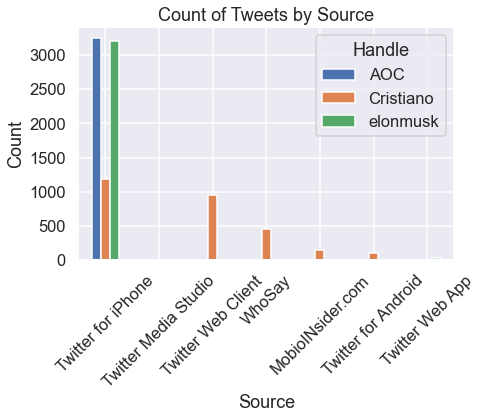

In [29]:
# just run this cell
device_counts.T.plot.bar(xlabel="Source",ylabel="Count",title="Count of Tweets by Source")
plt.xticks(rotation=45)
plt.legend(title="Handle");

<!-- BEGIN QUESTION -->

---
### Question 2e
<!--
BEGIN QUESTION
name: q2e
points: 2
manual: true
-->

What might we want to investigate further?  Write a few sentences below.

We might to investigate when the tweets' users are most active so that we can choose the time to post our advertisement to catch more eyes.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

---
### Question 2f

We just looked at the top 5 most commonly used devices for each user. However, we used the number of tweets as a measure, when it might be better to compare these distributions by comparing _proportions_ of tweets. Why might proportions of tweets be better measures than numbers of tweets?

<!--
BEGIN QUESTION
name: q2f
points: 1
manual: true

-->

Proportions account for the total number of tweets a user makes. If a user is very active and posts a lot, the number of tweets from a particular device might be high simply because they use that device more frequently, not necessarily because they prefer it. By looking at proportions, you normalize the data to the user's overall activity level, providing a fairer comparison across devices.

<!-- END QUESTION -->



<br/><br/><br/>
<br/><br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />


## Question 3: When?

Now that we've explored the sources of each of the tweets, we will perform some time series analysis. A look into the temporal aspect of the data could reveal insights about how a user spends their day, when they eat and sleep, etc. In this question, we will focus on the time at which each tweet was posted.


---
### Question 3a

Complete the following function `add_hour` that takes in a tweets dataframe `df`, and two column names `time_col` and `result_col`. Your function should use the timestamps in the `time_col` column to store in a new column `result_col` the computed  hour of the day as floating point number according to the formula:

$$
\text{hour} + \frac{\text{minute}}{60} + \frac{\text{second}}{60^{2}}
$$

**Note:** The below code calls your `add_hour` function and updates each tweets dataframe by using the `created_at` timestamp column to calculate and store the `hour` column.

**Hint:** See the following link for an example of working with timestamps using the [`dt` accessors](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#dt-accessor). 

<!--
BEGIN QUESTION
name: q3a
points: 1
-->

In [ ]:
def add_hour(df, time_col, result_col):
    ...
    return df

# do not modify the below code
tweets = {handle: add_hour(df, "created_at", "hour") for handle, df in tweets.items()}
tweets["AOC"]["hour"].head()

With our new `hour` column, let's take a look at the distribution of tweets for each user by time of day. The following cell helps create a density plot on the number of tweets based on the hour they are posted. 

The function `bin_df` takes in a dataframe, an array of bins, and a column name; it bins the the values in the specified column, returning a dataframe with the bin lower bound and the number of elements in the bin. This function uses [`pd.cut`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html), a pandas [utility](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) for binning numerical values that you may find helpful in the distant future.

Run the cell and answer the following question about the plot.

In [ ]:
# just run this cell
def bin_df(df, bins, colname):
    binned = ...
    return pd.DataFrame({"counts": binned, "bin": bins[:-1]})

hour_bins = np.arange(0, 24.5, .5)
binned_hours = {handle: bin_df(df, hour_bins, "hour") for handle, df in tweets.items()}

for handle, df in binned_hours.items():
        sns.lineplot(x="bin", y="counts", data=df, label=handle)
plt.title("Distribution of Tweets by Time of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Tweets")
plt.legend()


<!-- BEGIN QUESTION -->

---
### Question 3b
<!--
BEGIN QUESTION
name: q3b
points: 1
manual: true
-->
Compare Cristiano's distribution with those of AOC and Elon Musk. In particular, compare the distributions before and after Hour 6. What differences did you notice? What might be a possible cause of that? Do the data plotted above seem reasonable?

_Type your answer here, replacing this text._

<!-- END QUESTION -->

---
### Question 3c

To account for different locations of each user in our analysis, we will next adjust the `created_at` timestamp for each tweet to the respective timezone of each user. Complete the following function `convert_timezone` that takes in a tweets dataframe `df` and a timezone `new_tz` and adds a new column `converted_time` that has the adjusted `created_at` timestamp for each tweet. The timezone for each user is provided in `timezones`.

**Hint:** Again, please see the following link for an example of working with [`dt` accessors](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#dt-accessor).

<!--
BEGIN QUESTION
name: q3c
points: 1
-->

In [ ]:
def convert_timezone(df, new_tz):
    df['converted_time']= ...
    return df

timezones = {"AOC": "EST", "Cristiano": "Europe/Lisbon", "elonmusk": "America/Los_Angeles"}

tweets = {handle: convert_timezone(df, tz) for (handle, df), tz in zip(tweets.items(), timezones.values())}

With our adjusted timestamps for each user based on their timezone, let's take a look again at the distribution of tweets by time of day.

In [ ]:
# just run this cell
def make_line_plot(df_dict, x_col, y_col, include=None, title=None, xlabel=None, ylabel=None, legend=True):
    """
    Plot a line plot of two columns for each dataframe in `df_dict`.
    
    Uses `sns.lineplot` to plot a line plot of two columns for each
    dataframe in `df_dict`. The keys of `df_dict` are used as entries in
    the legend when `legend` is `True`.
    
    Parameters
    ----------
        df_dict: dict[str: pd.DataFrame]
            a dictionary mapping handles to dataframes with the data to plot
        x_col: str
            the name of a column in each dataframe in `df_dict` to plot on
            the x-axis
        y_col: str
            the name of a column in each dataframe in `df_dict` to plot on
            the y-axis
        include: list[str], optional
            a list of handles to include in the plot; all keys in `df_dict` not 
            present in `include`, if specified, will *not* be included in the plot
        title: str, optional
            a title for the plot
        xlabel: str, optional
            a label for the x-axis; if unspecified, `x_col` is used
        ylabel: str, optional
            a label for the y-axis; if unspecified, `y_col` is used
        legend: bool, optional
            whether to include a legend with each key in `df_dict`
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    if include is not None:
        df_dict = {k: v for k, v in df_dict.items() if k in include}

    plt.figure(figsize=[10,6])
    for handle, df in df_dict.items():
        sns.lineplot(x=x_col, y=y_col, data=df, label=handle)
    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if not legend:
        plt.gca().get_legend().remove()

tweets = {handle: add_hour(df, "converted_time", "converted_hour") for handle, df in tweets.items()}
binned_hours = {handle: bin_df(df, hour_bins, "converted_hour") for handle, df in tweets.items()}

make_line_plot(binned_hours, "bin", "counts", title="Distribution of Tweets by Time of Day (timezone-corrected)",
               xlabel="Hour", ylabel="Number of Tweets")

<br/><br/><br/>
<br/><br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />


## Question 4: Sentiment


In the past few questions, we have explored the sources of the tweets and when they are posted. Although on their own, they might not seem particularly intricate, combined with the power of regular expressions, they could actually help us infer a lot about the users. In this section, we will continue building on our past analysis and specifically look at the sentiment of each tweet -- this would lead us to a much more direct and detailed understanding of how the users view certain subjects and people. 


<br/>
How do we actually measure the sentiment of each tweet? In our case, we can use the words in the text of a tweet for our calculation! For example, the word "love" within the sentence "I love America!" has a positive sentiment, whereas the word "hate" within the sentence "I hate taxes!" has a negative sentiment. In addition, some words have stronger positive / negative sentiment than others: "I love America." is more positive than "I like America."

We will use the [VADER (Valence Aware Dictionary and sEntiment Reasoner)](https://github.com/cjhutto/vaderSentiment) lexicon to analyze the sentiment of AOC's tweets. VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media which is great for our usage.

The VADER lexicon gives the sentiment of individual words. Run the following cell to show the first few rows of the lexicon:

In [ ]:
# just run this cell
print(''.join(open("vader_lexicon.txt").readlines()[:10]))

As you can see, the lexicon contains emojis too! Each row contains a word and the *polarity* of that word, measuring how positive or negative the word is.

### VADER Sentiment Analysis

The creators of [VADER](https://github.com/cjhutto/vaderSentiment#introduction) describe the tool’s assessment of polarity, or “compound score,” in the following way:

“The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate.”

As you can see, VADER doesn't "read" sentences, but works by parsing sentences into words, assigning a preset generalized score from their testing sets to each word separately. 

VADER relies on humans to stabilize its scoring. The creators use Amazon Mechanical Turk, a crowdsourcing survey platform, to train its model. Its training data consists of a small corpus of tweets, New York Times editorials and news articles, Rotten Tomatoes reviews, and Amazon product reviews, tokenized using the natural language toolkit (NLTK). Each word in each dataset was reviewed and rated by at least 20 trained individuals who had signed up to work on these tasks through Mechanical Turk. 

<!-- BEGIN QUESTION -->

---
### Question 4a
Please score the sentiment of one of the following words, using your own personal interpretation. No code is required for this question!

- police
- order
- Democrat
- Republican
- gun
- dog
- technology
- TikTok
- security
- face-mask
- science
- climate change
- vaccine

What score did you give it and why? Can you think of a situation in which this word would carry the opposite sentiment to the one you’ve just assigned?

<!--
BEGIN QUESTION
name: q4a
points: 1
manual: true
-->

_Type your answer here, replacing this text._

---
### Question 4b

Let's first load in the data containing all the sentiments. Read `vader_lexicon.txt` into a dataframe called `sent`. The index of the dataframe should be the words in the lexicon and should be named `token`. `sent` should have one column named `polarity`, storing the polarity of each word.

**Hint:** The `pd.read_csv` function may help here. Since the file is tab-separated, be sure to set `sep='\t'` in your call to `pd.read_csv`.

<!--
BEGIN QUESTION
name: q4b
points: 1
-->

In [ ]:
sent = ...
sent.head()

---
### Question 4c

Before further analysis, we will need some more tools that can help us extract the necessary information and clean our data.

Complete the following regular expressions that will help us match part of a tweet that we either (i) want to remove or (ii) are interested in learning more about.

#### Question 4c Part (i)
Assign a regular expression to a new variable `punct_re` that captures all of the punctuations within a tweet. We consider punctuation to be any non-word, non-whitespace character.

**Note**: A word character is any character that is alphanumeric or an underscore. A whitespace character is any character that is a space, a tab, a new line, or a carriage return.

<!--
BEGIN QUESTION
name: q4ci
points: 1
-->

In [ ]:
punct_re = ...
re.sub(punct_re, " ", tweets["AOC"].iloc[0]["full_text"])


#### Question 4c Part (ii)
Assign a regular expression to a new variable `mentions_re` that matches any mention in a tweet. Your regular expression should use a capturing group to extract the user's username in a mention.

**Hint**: a user mention within a tweet always starts with the `@` symbol and is followed by a series of word characters (with no space in between). 

<!--
BEGIN QUESTION
name: q4cii
points: 1
-->

In [ ]:
mentions_re = ...

re.findall(mentions_re, tweets["AOC"].iloc[0]["full_text"])

<br/>

### Tweet Sentiments and User Mentions

As you have seen in the previous part of this question, there are actually a lot of interesting components that we can extract out of a tweet for further analysis! For the rest of this question though, we will focus on one particular case: the sentiment of each tweet in relation to the users mentioned within it. 

To calculate the sentiments for a sentence, we will follow this procedure:

1. Remove the punctuation from each tweet so we can analyze the words.
2. For each tweet, find the sentiment of each word.
3. Calculate the sentiment of each tweet by taking the sum of the sentiments of its words.

---
### Question 4d

Let's use our `punct_re` regular expression from the previous part to clean up the text a bit more! The goal here is to remove all of the punctuations to ensure words can be properly matched with those from VADER to actually calculate the full sentiment score.

Complete the following function `sanitize_texts` that takes in a table `df` and adds a new column `clean_text` by converting all characters in its original `full_text` column to lower case and replace all instances of punctuations with a space character.

<!--
BEGIN QUESTION
name: q4d
points: 1
-->

In [ ]:
def sanitize_texts(df):
    df["clean_text"] = ...
    return df

tweets = {handle: sanitize_texts(df) for handle, df in tweets.items()}
tweets["AOC"]["clean_text"].head()


---
### Question 4e
With the texts sanitized, we can now extract all the user mentions from tweets. 

Complete the following function `extract_mentions` that takes in the **`full_text`** (not `clean_text`!) column from a tweets dataframe  and uses `mentions_re` to extract all the mentions in a dataframe. The returned dataframe is:
* single-indexed by the IDs of the tweets
* has one row for each mention
* has one column named `mentions`, which contains each mention in all lower-cased characters


**Hint**: There are several ways to approach this problem. Here is documentation for potentially useful functions: `str.extractall` ([link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extractall.html?highlight=extractall)) and `str.findall` ([link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.findall.html)), `dropna` ([link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dropna.html?highlight=dropna#pandas.Series.dropna)), and `explode` ([link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.explode.html?highlight=series%20explode)).

<!--
BEGIN QUESTION
name: q4e
points: 2
-->

In [ ]:
def extract_mentions(full_texts):
    mentions = ...
    return mentions[["mentions"]]

# uncomment this line to help you debug
#display(extract_mentions(tweets["AOC"]["full_text"]).head())

# # do not modify the below code
mentions = {handle: extract_mentions(df["full_text"]) for handle, df in tweets.items()}
horiz_concat_df(mentions).head()

<br/>

### Tidying Up the Data

Now, let's convert the tweets into what's called a [*tidy format*](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) to make the sentiments easier to calculate. The `to_tidy_format` function implemented for you uses the `clean_text` column of each tweets dataframe to create a tidy table, which is:

* single-indexed by the IDs of the tweets, for every word in the tweet.
* has one column named `word`, which contains the individual words of each tweet.

Run the following cell to convert the table into the tidy format. Take a look at the first 5 rows from the "tidied" tweets dataframe for AOC and see if you can find out how the structure has changed.

**Note**: Although there is no work needed on your part, we have referenced a few more advanced pandas methods you might have not seen before -- you should definitely look them up in the documentation when you have a chance, as they are quite powerful in restructuring a dataframe into a useful intermediate state!

In [ ]:
# just run this cell
def to_tidy_format(df):
    tidy = (
        df["clean_text"]
        .str.split()
        .explode()
        .to_frame()
        .rename(columns={"clean_text": "word"})
    )
    return tidy

tidy_tweets = {handle: to_tidy_format(df) for handle, df in tweets.items()}
tidy_tweets["AOC"].head()

### Adding in the Polarity Score

Now that we have this table in the tidy format, it becomes much easier to find the sentiment of each tweet: we can join the table with the lexicon table. 

The following `add_polarity` function adds a new `polarity` column to the `df` table. The `polarity` column contains the sum of the sentiment polarity of each word in the text of the tweet.

**Note**: Again, though there is no work needed on your part, it is important for you to go through how we set up this method and actually understand what each method is doing. In particular, see how we deal with missing data.

In [ ]:
# just run this cell
def add_polarity(df, tidy_df):
    df["polarity"] = (
        tidy_df
        .merge(sent, how='left', left_on='word', right_index=True)
        .reset_index()
        .loc[:, ['id', 'polarity']]
        .fillna(0)
        .groupby('id')
        .sum()
    )
    return df

tweets = {handle: add_polarity(df, tidy_df) for (handle, df), tidy_df in \
          zip(tweets.items(), tidy_tweets.values())}
tweets["AOC"][["clean_text", "polarity"]].head()

---
### Question 4f
Finally, with our polarity column in place, we can finally explore how the sentiment of each tweet relates to the user(s) mentioned in it. 

Complete the following function `mention_polarity` that takes in a mentions dataframe `mentions` and the original tweets dataframe `df` and returns a series where the mentioned users are the index and the corresponding mean sentiment scores of the tweets mentioning them are the values.

**Hint**: You should consider joining tables together in this question.

<!--
BEGIN QUESTION
name: q4f
points: 2
-->

In [ ]:
def mention_polarity(df, mention_df):
    ...

aoc_mention_polarity = mention_polarity(tweets["AOC"],mentions["AOC"]).sort_values(ascending=False)
aoc_mention_polarity

<!-- BEGIN QUESTION -->

---
### Question 4g

When grouping by mentions and aggregating the polarity of the tweets, what aggregation function should we use? What might be one drawback of using the mean?

<!--
BEGIN QUESTION
name: q4g
points: 2
manual: true
-->

_Type your answer here, replacing this text._

<!-- END QUESTION -->



<br/><br/><br/>
<br/><br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />


## Question 5: You Do EDA!

Congratulations! You have finished all of the preliminary analysis on AOC, Cristiano, and Elon Musk's recent tweets. 

As you might have recognized, there is still far more to explore within the data and build upon what we have uncovered so far. In this open-ended question, we want you to come up with a new perspective that can expand upon our analysis of the sentiment of each tweet. 

For this question, you will perform some text analysis on our `tweets` dataset. Your analysis should have two parts:

1. a piece of code that manipulates `tweets` in some way and produces informative output (e.g. a dataframe, series, or plot)
2. a short (4-5 sentence) description of the findings of your analysis: what were you looking for? What did you find? How did you go about answering your question?

Your work should involve text analysis in some way, whether that's using regular expressions or some other form.




To assist you in getting started, here are a few ideas for this you can analyze for this question:

- dig deeper into when devices were used
- how sentiment varies with time of tweet
- expand on regexes from 4b to perform additional analysis (e.g. hashtags)
- examine sentiment of tweets over time

In general, try to combine the analyses from earlier questions or create new analysis based on the scaffolding we have provided.

This question is worth 4 points and will be graded based on this rubric:

| | 2 points | 1 point | 0 points |
|-----|-----|-----|-----|
| **Code** | Produces a mostly informative plot or pandas output that addresses the question posed in the student's description and uses at least one of the following pandas DataFrame/Series methods: `groupby`, `agg`, `merge`, `pivot_table`, `str`, `apply` | Attempts to produce a plot or manipulate data but the output is unrelated to the proposed question, or doesn't utilize at least one of the listed methods | No attempt at writing code |
| **Description** | Describes the analysis question and procedure comprehensively and summarizes results correctly | Attempts to describe analysis and results but description of results is incorrect or analysis of results is disconnected from the student’s original question | No attempt at writing a description |

<!-- BEGIN QUESTION -->

---
### Question 5a

Use this space to put your EDA code.

<!--
BEGIN QUESTION
name: q5a
manual: true
points: 2
-->

In [ ]:
# perform your text analysis here

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

---
### Question 5b

Use this space to put your EDA description.

<!--
BEGIN QUESTION
name: q5b
manual: true
points: 2
-->

_Write your description here._

<!-- END QUESTION -->



## Congratulations! You have finished Lab 3!